# Base Map

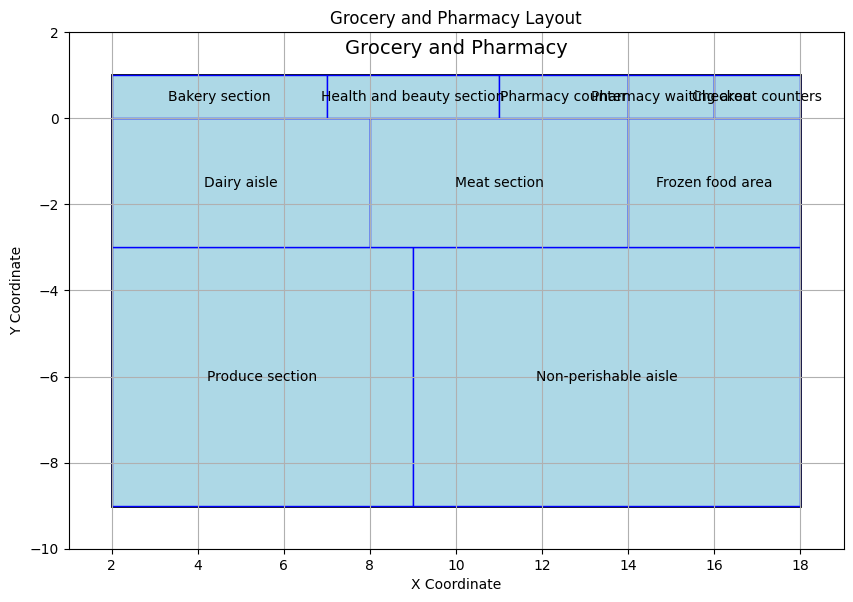

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the dimensions of the main place
main_place_coords = [2, -9, 18, 1]
main_width = main_place_coords[2] - main_place_coords[0]
main_height = main_place_coords[3] - main_place_coords[1]

# Define subitems with their coordinates
subitems = [
    {"name": "Produce section", "coordinates": [2, -9, 9, -3]},
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Add the main place as a large rectangle
main_rect = patches.Rectangle((main_place_coords[0], main_place_coords[1]),
                              main_width, main_height, linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(main_rect)
ax.text(main_place_coords[0] + main_width / 2, main_place_coords[1] + main_height + 0.5,
        "Grocery and Pharmacy", ha='center', fontsize=14)

# Add each subitem as a rectangle
for subitem in subitems:
    x1, y1, x2, y2 = subitem["coordinates"]
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='blue', facecolor='lightblue')
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, subitem["name"], ha='center', va='center', fontsize=10)

# Set plot limits and labels
ax.set_xlim(main_place_coords[0] - 1, main_place_coords[2] + 1)
ax.set_ylim(main_place_coords[1] - 1, main_place_coords[3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


# Iteration 0 (OG Prompt)
### Issues -> parts of the items left the produce section!

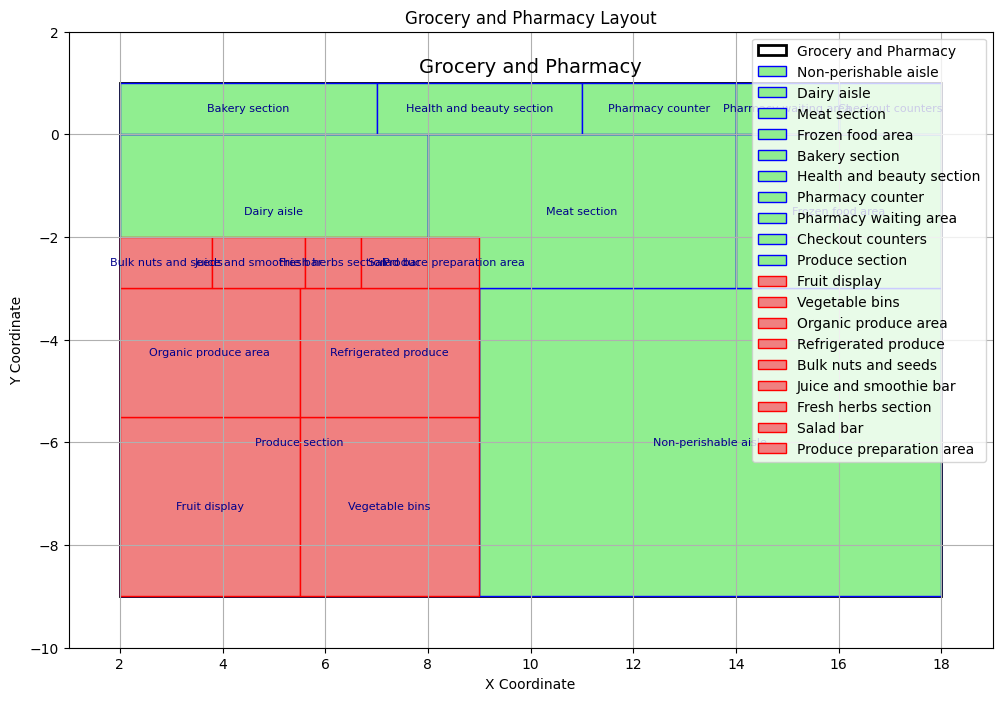

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
        {"name": "Fruit display", "coordinates": [2, -9, 5.5, -5.5]},
        {"name": "Vegetable bins", "coordinates": [5.5, -9, 9, -5.5]},
        {"name": "Organic produce area", "coordinates": [2, -5.5, 5.5, -3]},
        {"name": "Refrigerated produce", "coordinates": [5.5, -5.5, 9, -3]},
        {"name": "Bulk nuts and seeds", "coordinates": [2, -3, 3.8, -2]},
        {"name": "Juice and smoothie bar", "coordinates": [3.8, -3, 5.6, -2]},
        {"name": "Fresh herbs section", "coordinates": [5.6, -3, 6.7, -2]},
        {"name": "Salad bar", "coordinates": [6.7, -3, 8, -2]},
        {"name": "Produce preparation area", "coordinates": [8, -3, 9, -2]}
    ]}

]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper right')
plt.show()


# Iteration 1 (More specifically...)
### Looks horrendous, things are still horizontally and vertically leaving the region, which is weird. Also some things are still above produce region. 


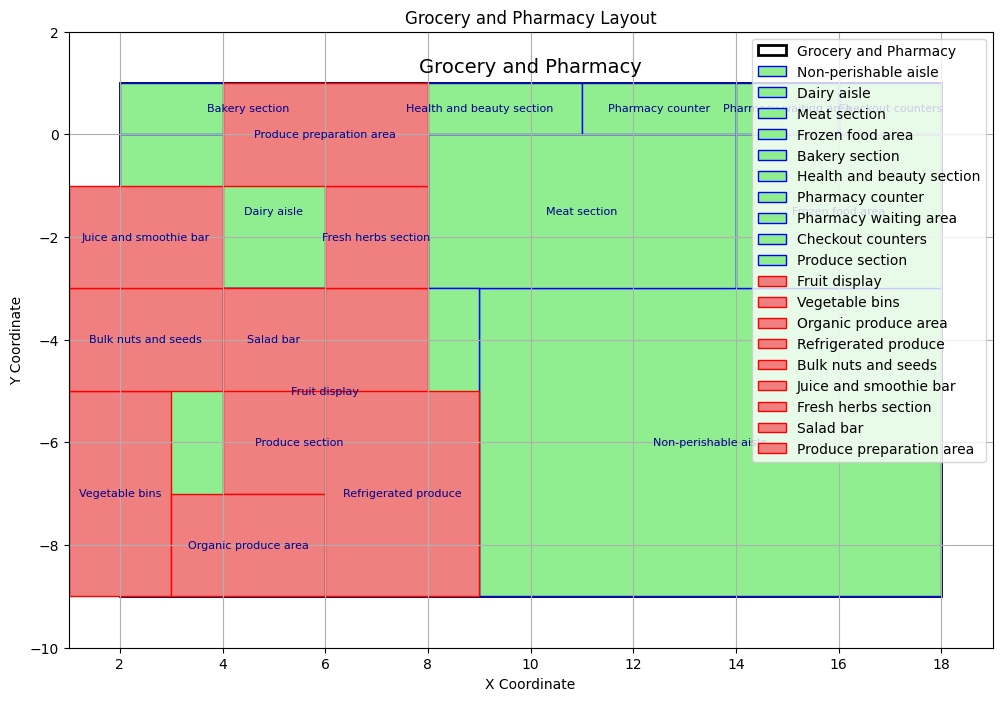

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
        {"name": "Fruit display","coordinates": [4, -7, 8, -3]},
        {"name": "Vegetable bins", "coordinates": [1, -9, 3, -5]},
        {"name": "Organic produce area", "coordinates": [3, -9, 6, -7]},
        {"name": "Refrigerated produce", "coordinates": [6, -9, 9, -5]},
        {"name": "Bulk nuts and seeds", "coordinates": [1, -5, 4, -3]},
        {"name": "Juice and smoothie bar", "coordinates": [1, -3, 4, -1]},
        {"name": "Fresh herbs section", "coordinates": [6, -3, 8, -1]},
        {"name": "Salad bar", "coordinates": [4, -5, 6, -3]},
        {"name": "Produce preparation area", "coordinates": [4, -1, 8, 1]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper right')
plt.show()

# Iteration 2 (Added x and y must both stay within bounds)
### Looking better? but i think adding in all the coordinates things is confusing the model quite a bit. Language vs code maybe? Try telling the model to instead use code to verify instead of just language (tool use!). Though to its defense most of the items are now within the produce section exclusively (except for the organic produce section that is). 

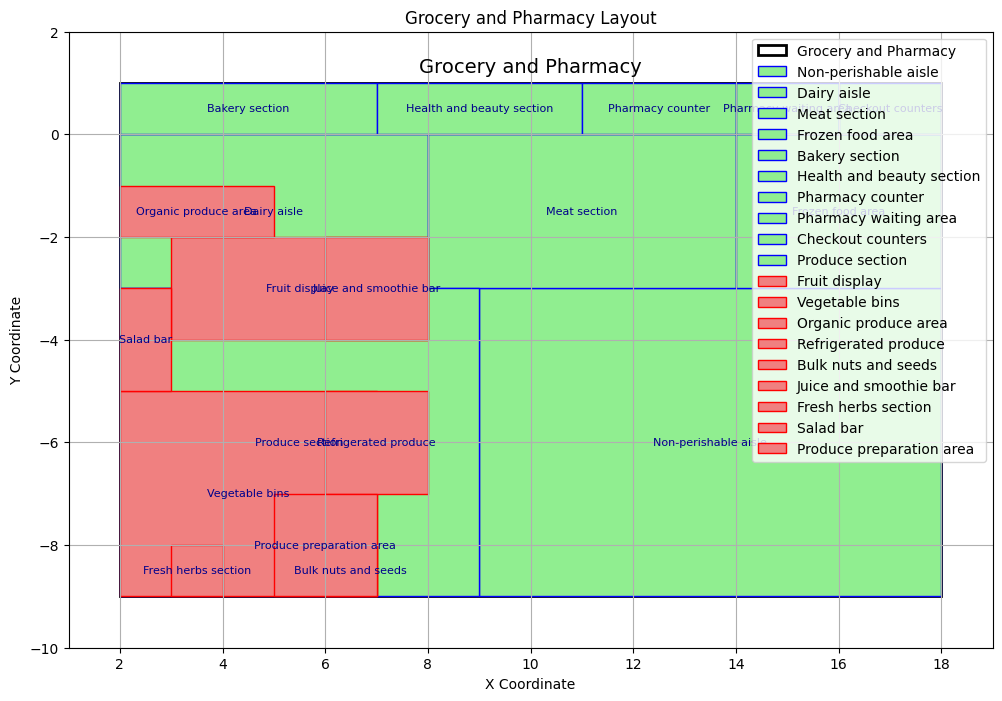

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
      {"name": "Fruit display", "coordinates": [3, -4, 8, -2]},
      {"name": "Vegetable bins", "coordinates": [2, -9, 7, -5]},
      {"name": "Organic produce area", "coordinates": [2, -2, 5, -1]},
      {"name": "Refrigerated produce", "coordinates": [6, -7, 8, -5]},
      {"name": "Bulk nuts and seeds", "coordinates": [6, -9, 7, -8]},
      {"name": "Juice and smoothie bar", "coordinates": [6, -4, 8, -2]},
      {"name": "Fresh herbs section", "coordinates": [3, -9, 4, -8]},
      {"name": "Salad bar", "coordinates": [2, -5, 3, -3]},
      {"name": "Produce preparation area", "coordinates": [5, -9, 7, -7]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper right')
plt.show()

# Iteration 3 
### I think this was a GPT 3 run, can't really remember what i did to get this lol

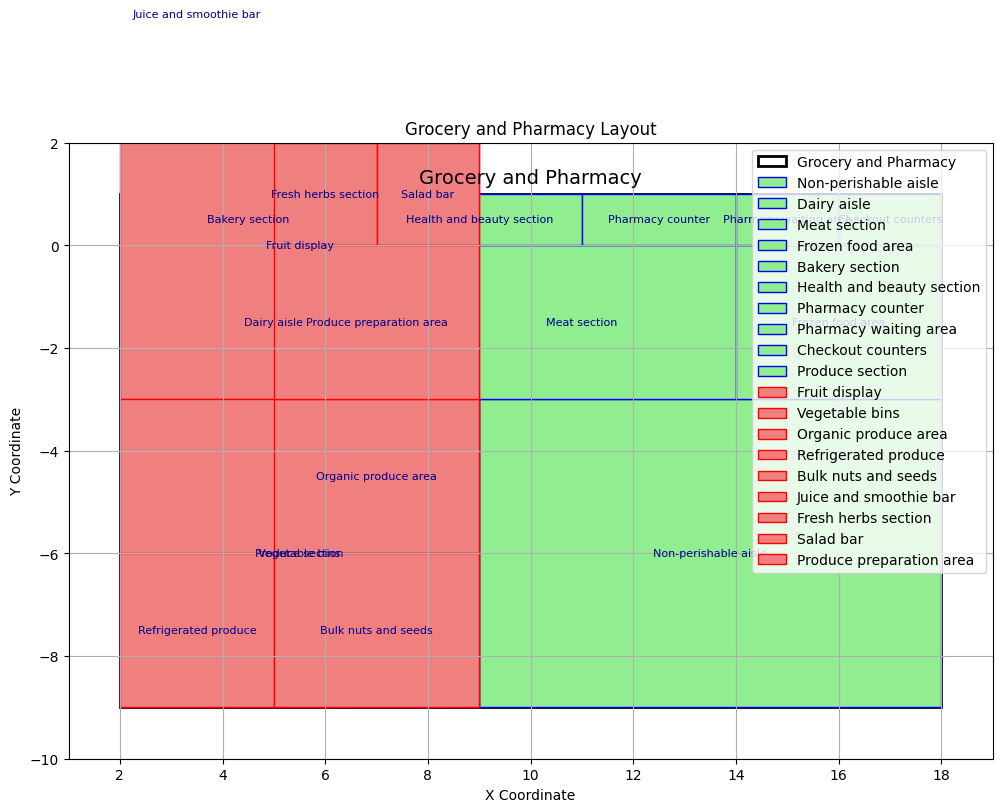

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
      {"name": "Fruit display", "coordinates": [2, -3, 9, 3]},
      {"name": "Vegetable bins", "coordinates": [2, -9, 9, -3]},
      {"name": "Organic produce area", "coordinates": [5, -6, 9, -3]},
      {"name": "Refrigerated produce", "coordinates": [2, -9, 5, -6]},
      {"name": "Bulk nuts and seeds", "coordinates": [5, -9, 9, -6]},
      {"name": "Juice and smoothie bar", "coordinates": [2, 3, 5, 6]},
      {"name": "Fresh herbs section", "coordinates": [5, 0, 7, 2]},
      {"name": "Salad bar", "coordinates": [7, 0, 9, 2]},
      {"name": "Produce preparation area", "coordinates": [5, -3, 9, 0]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper right')
plt.show()

# Iteration 4 (You can use code to verify, for eg...)
### Looks great! However there’s an overlap with the very last item. But looking at the reasoning, it makes sense, kinda? It’s saying that it’s “positioned BEHIND the fruit display” so technically, there’s not really an overlap? It’s thinking about 3D, need to inform prompt that this is a 2D floormap, no “behind”.

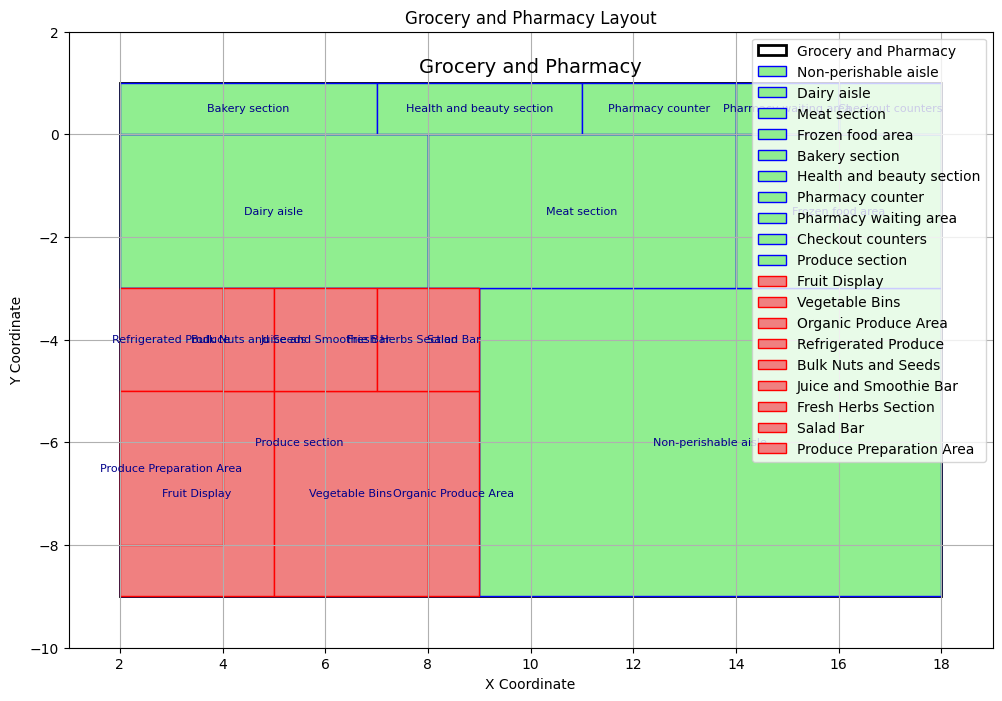

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
        {"name": "Fruit Display", "coordinates": [2, -9, 5, -5]},
        {"name": "Vegetable Bins", "coordinates": [5, -9, 8, -5]},
        {"name": "Organic Produce Area", "coordinates": [8, -9, 9, -5]},
        {"name": "Refrigerated Produce", "coordinates": [2, -5, 4, -3]},
        {"name": "Bulk Nuts and Seeds", "coordinates": [4, -5, 5, -3]},
        {"name": "Juice and Smoothie Bar", "coordinates": [5, -5, 7, -3]},
        {"name": "Fresh Herbs Section", "coordinates": [7, -5, 8, -3]},
        {"name": "Salad Bar", "coordinates": [8, -5, 9, -3]},
        {"name": "Produce Preparation Area", "coordinates": [2, -8, 4, -5]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper right')
plt.show()

# Iteration 5 (2D floormap!)
### Tweaked again!! The produce preparation area just has nowhere to go. The model iteratively adds in objects and it adds them in to maximize the amount of space used. So it’s gonna have a lot of blank space, and it functions on a grid based system. So for example if item 1 it places in is of height 3, then the next two items are all gonna be of height 3 but their widths sum up to the width of the parent object. The height of each row is fixed from the moment that it adds in the first item of that row. Eg the moment bulk nuts and seeds is added, juice and smooth bar and salad bar will all be of height 1. This is fine, it looks valid for the most part, the only issue is, it will run out of space almost certainly every time we’ve ran it with all 10 of these objects. And the order that they’re added in is the same every time, so produce preparation area is almost always the one that’s left out. It literally ran out of space to put the produce preparation, so it just moved it outside. Otherwise, everything remains within the box. 


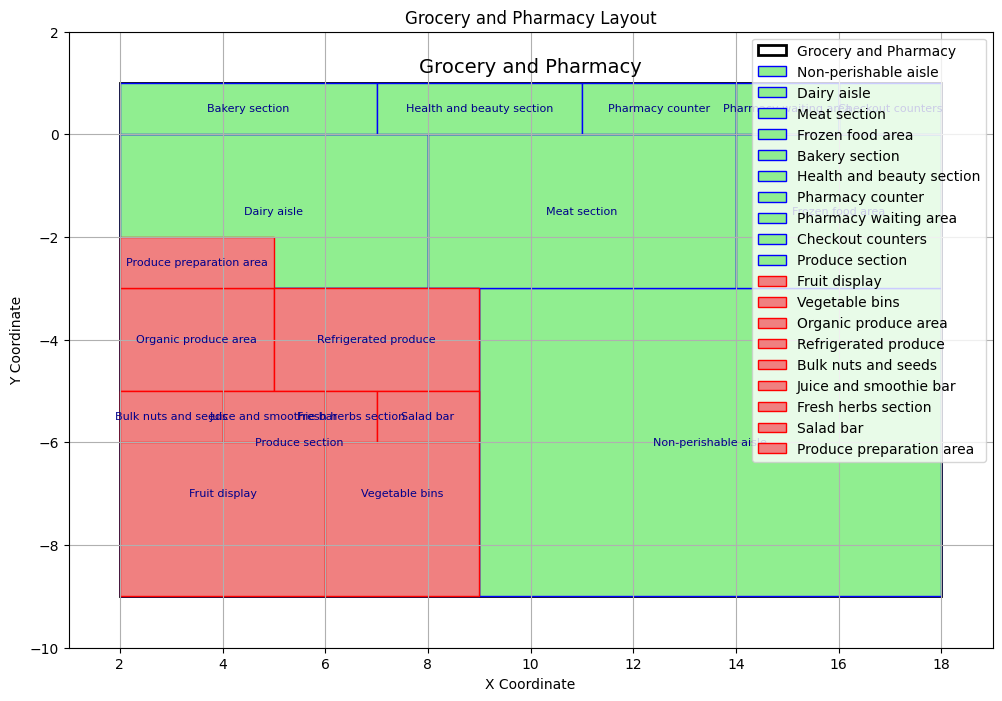

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
        {"name": "Fruit display", "coordinates": [2, -9, 6, -5]},
        {"name": "Vegetable bins", "coordinates": [6, -9, 9, -5]},
        {"name": "Organic produce area", "coordinates": [2, -5, 5, -3]},
        {"name": "Refrigerated produce", "coordinates": [5, -5, 9, -3]},
        {"name": "Bulk nuts and seeds", "coordinates": [2, -6, 4, -5]},
        {"name": "Juice and smoothie bar", "coordinates": [4, -6, 6, -5]},
        {"name": "Fresh herbs section", "coordinates": [6, -6, 7, -5]},
        {"name": "Salad bar", "coordinates": [7, -6, 9, -5]},
        {"name": "Produce preparation area", "coordinates": [2, -3, 5, -2]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper right')
plt.show()

# Iteration 6 (If there's an extra item you can't include, don't include and tell me why)
### Think it overloaded with instructions, there’s hella overlap again. Not sure if it knows which one of the requirements to focus on anymore, may need to reformat the prompt to highlight the key points: no overlap, fit all within box. Although everything is indeed fit into the parent box now 😅Gonna try it with a different parent object and see how it does.


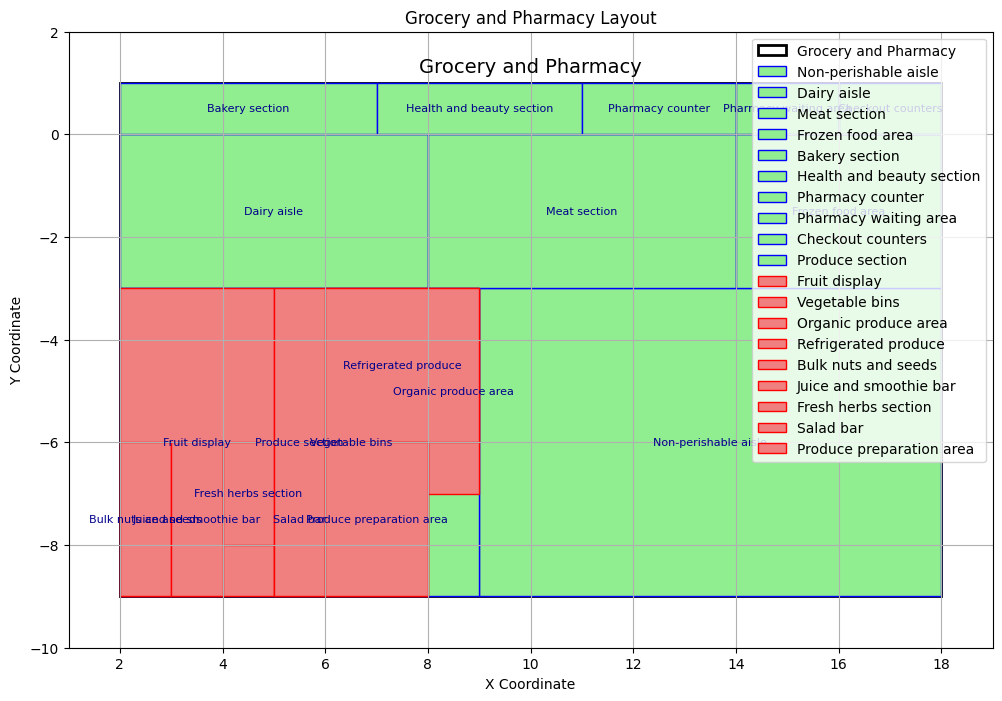

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
        {"name": "Fruit display", "coordinates": [2, -3, 5, -9]},
        {"name": "Vegetable bins", "coordinates": [5, -3, 8, -9]},
        {"name": "Organic produce area", "coordinates": [8, -3, 9, -7]},
        {"name": "Refrigerated produce", "coordinates": [6, -3, 9, -6]},
        {"name": "Bulk nuts and seeds", "coordinates": [2, -6, 3, -9]},
        {"name": "Juice and smoothie bar", "coordinates": [3, -6, 4, -9]},
        {"name": "Fresh herbs section", "coordinates": [4, -6, 5, -8]},
        {"name": "Salad bar", "coordinates": [5, -6, 6, -9]},
        {"name": "Produce preparation area", "coordinates": [6, -6, 8, -9]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='upper right')
plt.show()

# Ran it on non-perishable aisle

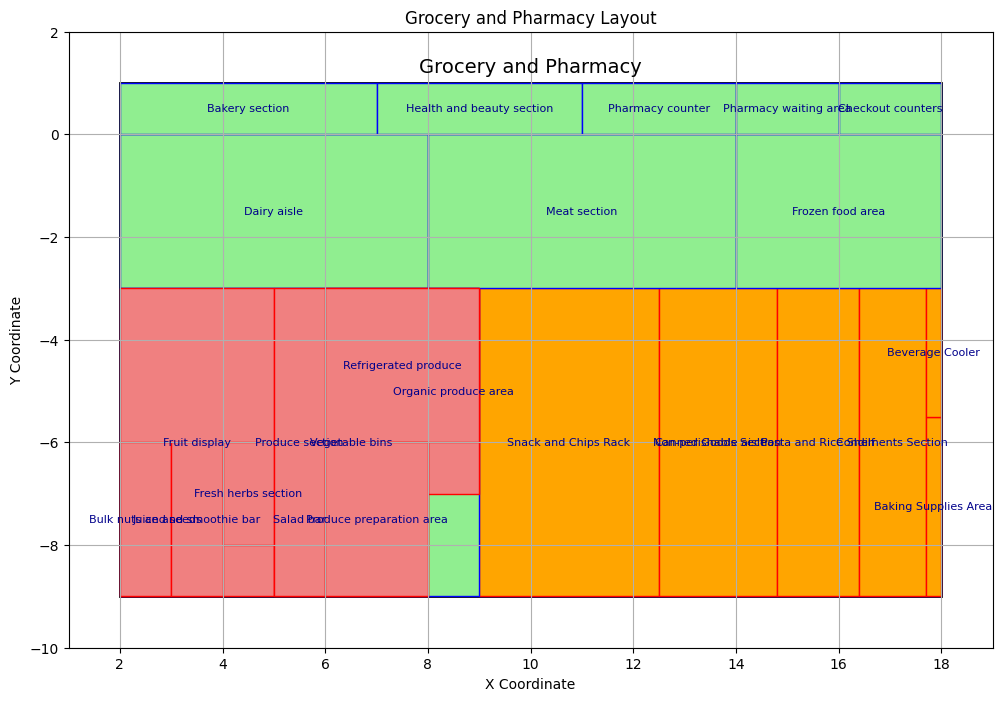

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3], "children":[
         {"name": "Snack and Chips Rack", "coordinates": [9, -9, 12.5, -3]},
         {"name": "Canned Goods Section", "coordinates": [12.5, -9, 14.8, -3]},
         {"name": "Pasta and Rice Shelf", "coordinates": [14.8, -9, 16.4, -3]},
         {"name": "Condiments Section", "coordinates": [16.4, -9, 17.7, -3]},
         {"name": "Baking Supplies Area", "coordinates": [17.7, -9, 18, -5.5]},
         {"name": "Beverage Cooler", "coordinates": [17.7, -5.5, 18, -3]}
    ]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
        {"name": "Fruit display", "coordinates": [2, -3, 5, -9]},
        {"name": "Vegetable bins", "coordinates": [5, -3, 8, -9]},
        {"name": "Organic produce area", "coordinates": [8, -3, 9, -7]},
        {"name": "Refrigerated produce", "coordinates": [6, -3, 9, -6]},
        {"name": "Bulk nuts and seeds", "coordinates": [2, -6, 3, -9]},
        {"name": "Juice and smoothie bar", "coordinates": [3, -6, 4, -9]},
        {"name": "Fresh herbs section", "coordinates": [4, -6, 5, -8]},
        {"name": "Salad bar", "coordinates": [5, -6, 6, -9]},
        {"name": "Produce preparation area", "coordinates": [6, -6, 8, -9]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            if subitem["name"] == "Non-perishable aisle":
                add_rectangle(ax, child["name"], child["coordinates"], color='orange', edgecolor='red')
            elif subitem["name"] == "Produce section":
                add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')
            else:
                add_rectangle(ax, child["name"], child["coordinates"], color='blue', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
# plt.legend(loc='upper right')
plt.show()

# Ran it on Dairy Aisle

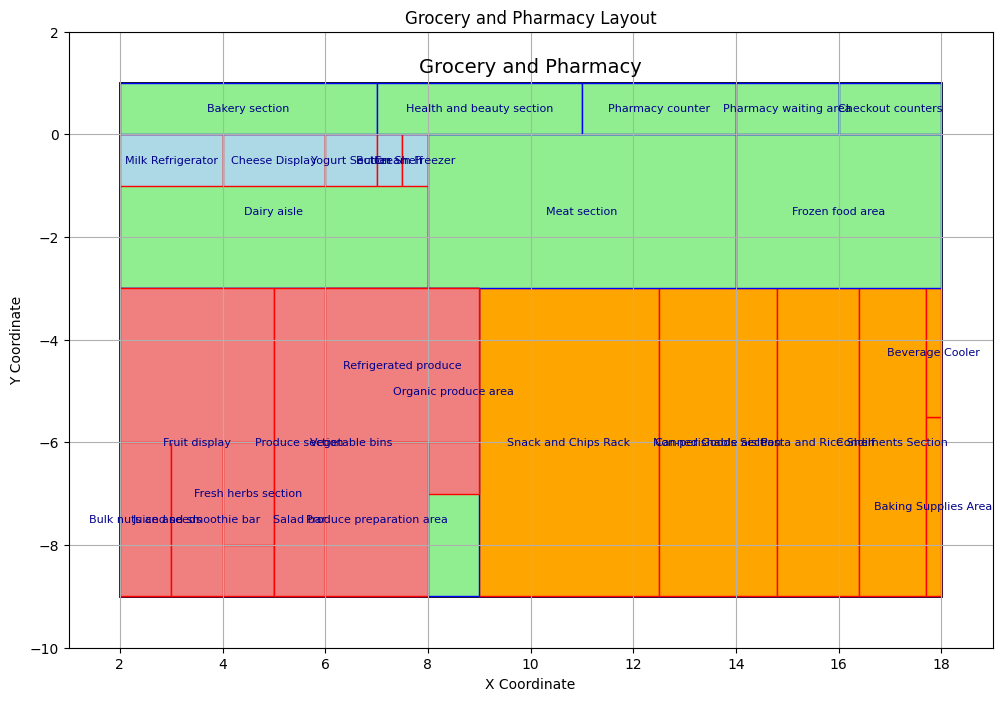

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3], "children":[
         {"name": "Snack and Chips Rack", "coordinates": [9, -9, 12.5, -3]},
         {"name": "Canned Goods Section", "coordinates": [12.5, -9, 14.8, -3]},
         {"name": "Pasta and Rice Shelf", "coordinates": [14.8, -9, 16.4, -3]},
         {"name": "Condiments Section", "coordinates": [16.4, -9, 17.7, -3]},
         {"name": "Baking Supplies Area", "coordinates": [17.7, -9, 18, -5.5]},
         {"name": "Beverage Cooler", "coordinates": [17.7, -5.5, 18, -3]}
    ]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0], "children": [
        {"name": "Milk Refrigerator", "coordinates": [2, -1, 4, 0]},
        {"name": "Cheese Display", "coordinates": [4, -1, 6, 0]},
        {"name": "Yogurt Section", "coordinates": [6, -1, 7, 0]},
        {"name": "Butter Shelf", "coordinates": [7, -1, 7.5, 0]},
        {"name": "Cream Freezer", "coordinates": [7.5, -1, 8, 0]}
    ]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
        {"name": "Fruit display", "coordinates": [2, -3, 5, -9]},
        {"name": "Vegetable bins", "coordinates": [5, -3, 8, -9]},
        {"name": "Organic produce area", "coordinates": [8, -3, 9, -7]},
        {"name": "Refrigerated produce", "coordinates": [6, -3, 9, -6]},
        {"name": "Bulk nuts and seeds", "coordinates": [2, -6, 3, -9]},
        {"name": "Juice and smoothie bar", "coordinates": [3, -6, 4, -9]},
        {"name": "Fresh herbs section", "coordinates": [4, -6, 5, -8]},
        {"name": "Salad bar", "coordinates": [5, -6, 6, -9]},
        {"name": "Produce preparation area", "coordinates": [6, -6, 8, -9]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            if subitem["name"] == "Non-perishable aisle":
                add_rectangle(ax, child["name"], child["coordinates"], color='orange', edgecolor='red')
            elif subitem["name"] == "Produce section":
                add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')
            else:
                add_rectangle(ax, child["name"], child["coordinates"], color='lightblue', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
# plt.legend(loc='upper right')
plt.show()

# Told it to use all vertical space in Dairy Aisle as well

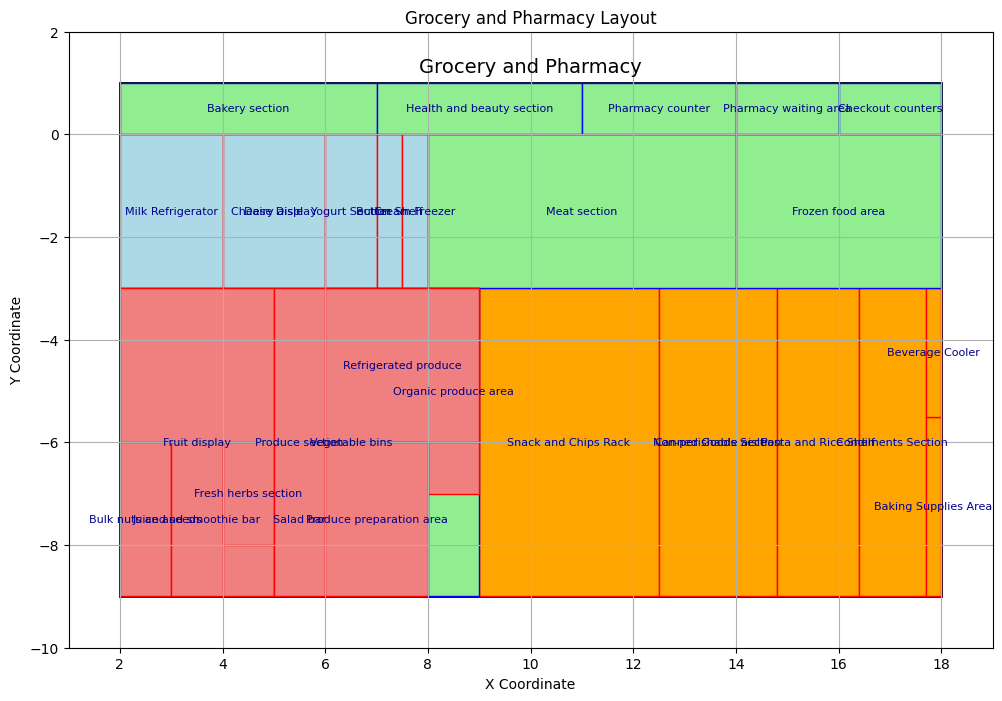

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3], "children":[
         {"name": "Snack and Chips Rack", "coordinates": [9, -9, 12.5, -3]},
         {"name": "Canned Goods Section", "coordinates": [12.5, -9, 14.8, -3]},
         {"name": "Pasta and Rice Shelf", "coordinates": [14.8, -9, 16.4, -3]},
         {"name": "Condiments Section", "coordinates": [16.4, -9, 17.7, -3]},
         {"name": "Baking Supplies Area", "coordinates": [17.7, -9, 18, -5.5]},
         {"name": "Beverage Cooler", "coordinates": [17.7, -5.5, 18, -3]}
    ]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0], "children": [
        {"name": "Milk Refrigerator", "coordinates": [2, -3, 4, 0]},
        {"name": "Cheese Display", "coordinates": [4, -3, 6, 0]},
        {"name": "Yogurt Section", "coordinates": [6, -3, 7, 0]},
        {"name": "Butter Shelf", "coordinates": [7, -3, 7.5, 0]},
        {"name": "Cream Freezer", "coordinates": [7.5, -3, 8, 0]}
    ]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
        {"name": "Fruit display", "coordinates": [2, -3, 5, -9]},
        {"name": "Vegetable bins", "coordinates": [5, -3, 8, -9]},
        {"name": "Organic produce area", "coordinates": [8, -3, 9, -7]},
        {"name": "Refrigerated produce", "coordinates": [6, -3, 9, -6]},
        {"name": "Bulk nuts and seeds", "coordinates": [2, -6, 3, -9]},
        {"name": "Juice and smoothie bar", "coordinates": [3, -6, 4, -9]},
        {"name": "Fresh herbs section", "coordinates": [4, -6, 5, -8]},
        {"name": "Salad bar", "coordinates": [5, -6, 6, -9]},
        {"name": "Produce preparation area", "coordinates": [6, -6, 8, -9]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            if subitem["name"] == "Non-perishable aisle":
                add_rectangle(ax, child["name"], child["coordinates"], color='orange', edgecolor='red')
            elif subitem["name"] == "Produce section":
                add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')
            else:
                add_rectangle(ax, child["name"], child["coordinates"], color='lightblue', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
# plt.legend(loc='upper right')
plt.show()

# Best Results Overall

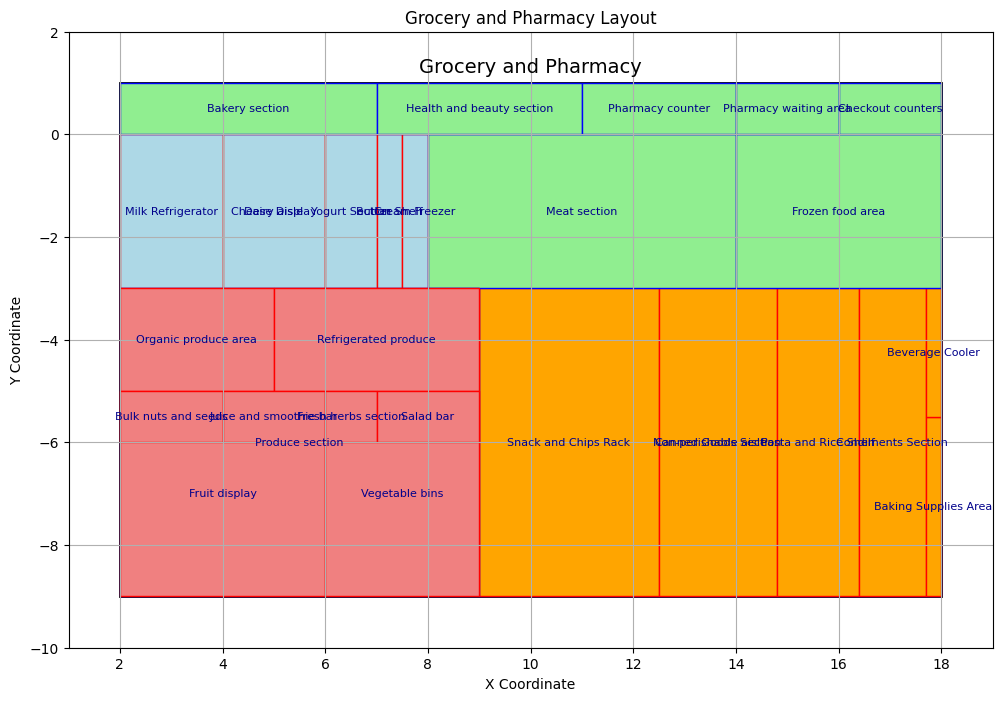

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to add a rectangle for a subitem
def add_rectangle(ax, name, coordinates, color='lightblue', edgecolor='blue'):
    x1, y1, x2, y2 = coordinates
    width = x2 - x1
    height = y2 - y1
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor=edgecolor, facecolor=color, label=name)
    ax.add_patch(rect)
    ax.text(x1 + width / 2, y1 + height / 2, name, ha='center', va='center', fontsize=8, color='darkblue')

# Define the main "Grocery and Pharmacy" area
main_area = {"name": "Grocery and Pharmacy", "coordinates": [2, -9, 18, 1]}

# Define the subitems with their coordinates
subitems = [
    {"name": "Non-perishable aisle", "coordinates": [9, -9, 18, -3], "children":[
         {"name": "Snack and Chips Rack", "coordinates": [9, -9, 12.5, -3]},
         {"name": "Canned Goods Section", "coordinates": [12.5, -9, 14.8, -3]},
         {"name": "Pasta and Rice Shelf", "coordinates": [14.8, -9, 16.4, -3]},
         {"name": "Condiments Section", "coordinates": [16.4, -9, 17.7, -3]},
         {"name": "Baking Supplies Area", "coordinates": [17.7, -9, 18, -5.5]},
         {"name": "Beverage Cooler", "coordinates": [17.7, -5.5, 18, -3]}
    ]},
    {"name": "Dairy aisle", "coordinates": [2, -3, 8, 0], "children": [
        {"name": "Milk Refrigerator", "coordinates": [2, -3, 4, 0]},
        {"name": "Cheese Display", "coordinates": [4, -3, 6, 0]},
        {"name": "Yogurt Section", "coordinates": [6, -3, 7, 0]},
        {"name": "Butter Shelf", "coordinates": [7, -3, 7.5, 0]},
        {"name": "Cream Freezer", "coordinates": [7.5, -3, 8, 0]}
    ]},
    {"name": "Meat section", "coordinates": [8, -3, 14, 0]},
    {"name": "Frozen food area", "coordinates": [14, -3, 18, 0]},
    {"name": "Bakery section", "coordinates": [2, 0, 7, 1]},
    {"name": "Health and beauty section", "coordinates": [7, 0, 11, 1]},
    {"name": "Pharmacy counter", "coordinates": [11, 0, 14, 1]},
    {"name": "Pharmacy waiting area", "coordinates": [14, 0, 16, 1]},
    {"name": "Checkout counters", "coordinates": [16, 0, 18, 1]},
    {"name": "Produce section", "coordinates": [2, -9, 9, -3], "children": [
        {"name": "Fruit display", "coordinates": [2, -9, 6, -5]},
        {"name": "Vegetable bins", "coordinates": [6, -9, 9, -5]},
        {"name": "Organic produce area", "coordinates": [2, -5, 5, -3]},
        {"name": "Refrigerated produce", "coordinates": [5, -5, 9, -3]},
        {"name": "Bulk nuts and seeds", "coordinates": [2, -6, 4, -5]},
        {"name": "Juice and smoothie bar", "coordinates": [4, -6, 6, -5]},
        {"name": "Fresh herbs section", "coordinates": [6, -6, 7, -5]},
        {"name": "Salad bar", "coordinates": [7, -6, 9, -5]}
    ]}
]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Add the main area as a large rectangle
main_rect = patches.Rectangle((main_area["coordinates"][0], main_area["coordinates"][1]),
                              main_area["coordinates"][2] - main_area["coordinates"][0],
                              main_area["coordinates"][3] - main_area["coordinates"][1],
                              linewidth=2, edgecolor='black', facecolor='none', label=main_area["name"])
ax.add_patch(main_rect)
ax.text(main_area["coordinates"][0] + (main_area["coordinates"][2] - main_area["coordinates"][0]) / 2,
        main_area["coordinates"][1] + (main_area["coordinates"][3] - main_area["coordinates"][1]) + 0.2,
        main_area["name"], ha='center', fontsize=14, color='black')

# Add each subitem as a rectangle
for subitem in subitems:
    add_rectangle(ax, subitem["name"], subitem["coordinates"], color='lightgreen')
    if "children" in subitem:
        for child in subitem["children"]:
            if subitem["name"] == "Non-perishable aisle":
                add_rectangle(ax, child["name"], child["coordinates"], color='orange', edgecolor='red')
            elif subitem["name"] == "Produce section":
                add_rectangle(ax, child["name"], child["coordinates"], color='lightcoral', edgecolor='red')
            else:
                add_rectangle(ax, child["name"], child["coordinates"], color='lightblue', edgecolor='red')

# Set plot limits and labels
ax.set_xlim(main_area["coordinates"][0] - 1, main_area["coordinates"][2] + 1)
ax.set_ylim(main_area["coordinates"][1] - 1, main_area["coordinates"][3] + 1)
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
ax.set_title("Grocery and Pharmacy Layout")

# Show grid and plot
ax.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
# plt.legend(loc='upper right')
plt.show()